In [ ]:
! pip install numpy pandas matplotlib seaborn jupyter scipy scikit-learn tqdm


In [4]:
#Verify Installations 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

print("All dependencies installed successfully ")


All dependencies installed successfully 


In [10]:
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


# Airbnb Asheville Market Analysis
## Step 2: Data Loading and Initial Inspection


In [2]:
# Import core libraries for data analysis and visualization
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns        # For advanced and cleaner visualizations

# Improve plot appearance
plt.style.use("seaborn-v0_8")

# Display all columns when printing DataFrames
pd.set_option("display.max_columns", None)


In [3]:
# Load Airbnb listings data (property-level information)
listings = pd.read_csv("D:\\PROJECT\\Airbnb Listings Analysis\\dataset\\raw\\listings.csv")

# Load Airbnb reviews data (guest activity and demand indicator)
reviews = pd.read_csv("D:\\PROJECT\\Airbnb Listings Analysis\\dataset\\raw\\reviews.csv")

# Load neighbourhood reference data
neighbourhoods = pd.read_csv("D:\\PROJECT\\Airbnb Listings Analysis\\dataset\\raw\\neighbourhoods.csv")


In [4]:
# Preview the first 5 rows of each dataset
listings.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,95.0,1,454,2025-06-14,2.69,8,162,16,NaN
1,197263,Tranquil Room & Private Bath,961396,Timothy,NaN,28806,35.577350,-82.638040,Private room,44.0,2,87,2024-09-08,0.56,2,73,5,NaN
2,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.617641,-82.551819,Entire home/apt,90.0,30,67,2025-05-03,0.40,1,268,2,NaN
3,246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.596150,-82.506350,Private room,61.0,7,53,2019-10-30,0.32,3,62,0,NaN
4,314540,Asheville Urban Farmhouse Entire Home 4.6 mi t...,381660,Tom,NaN,28806,35.585610,-82.627310,Entire home/apt,200.0,1,35,2025-06-13,0.22,1,139,11,NaN


In [5]:
reviews.head()


,listing_id,date
0,155305,2011-07-31
1,155305,2011-08-23
2,155305,2011-09-19
3,155305,2011-10-28
4,155305,2012-07-01


In [6]:
neighbourhoods.head()


,neighbourhood_group,neighbourhood
0,NaN,28704
1,NaN,28715
2,NaN,28732
3,NaN,28801
4,NaN,28803


In [7]:
# Check number of rows and columns
print("Listings shape:", listings.shape)
print("Reviews shape:", reviews.shape)
print("Neighbourhoods shape:", neighbourhoods.shape)


Listings shape: (2876, 18)
Reviews shape: (318549, 2)
Neighbourhoods shape: (8, 2)


In [8]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2876 non-null   int64  
 1   name                            2876 non-null   object 
 2   host_id                         2876 non-null   int64  
 3   host_name                       2876 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2876 non-null   int64  
 6   latitude                        2876 non-null   float64
 7   longitude                       2876 non-null   float64
 8   room_type                       2876 non-null   object 
 9   price                           2536 non-null   float64
 10  minimum_nights                  2876 non-null   int64  
 11  number_of_reviews               2876 non-null   int64  
 12  last_review                     26

In [9]:
# Count missing values per column in listings
listings.isnull().sum().sort_values(ascending=False)


license                           2876
neighbourhood_group               2876
price                              340
reviews_per_month                  263
last_review                        263
id                                   0
name                                 0
neighbourhood                        0
host_name                            0
host_id                              0
room_type                            0
longitude                            0
latitude                             0
number_of_reviews                    0
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [10]:
reviews.info()
reviews.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318549 entries, 0 to 318548
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  318549 non-null  int64 
 1   date        318549 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


listing_id    0
date          0
dtype: int64

In [12]:
neighbourhoods.info()
neighbourhoods.isnull().sum().sort_values(ascending=False)

 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 260.0 bytes


neighbourhood_group    8
neighbourhood          0
dtype: int64

## Step 3: Data Cleaning and Preparation


In [13]:
# Drop columns that are either completely empty or not useful for analysis
listings = listings.drop(
    columns=["neighbourhood_group", "license"],
    errors="ignore"
)


In [14]:
# Remove listings where price is missing
# Price is essential for all pricing analysis
listings = listings.dropna(subset=["price"])


In [15]:
# Remove unrealistic price values to avoid skewed analysis
# Lower bound: $20 (very low values are often data errors)
# Upper bound: $1000 (extreme luxury listings)
listings = listings[(listings["price"] >= 20) & (listings["price"] <= 1000)]


In [16]:
# Fill missing reviews_per_month with 0
# Missing values usually mean new listings with no reviews yet
listings["reviews_per_month"] = listings["reviews_per_month"].fillna(0)


In [17]:
# Convert review date from string to datetime format
reviews["date"] = pd.to_datetime(reviews["date"])


In [18]:
# Check for remaining missing values
listings.isnull().sum().sort_values(ascending=False)


last_review                       197
id                                  0
host_id                             0
name                                0
neighbourhood                       0
latitude                            0
longitude                           0
host_name                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

### Data Cleaning Summary
- Removed irrelevant and empty columns (`neighbourhood_group`, `license`)
- Dropped listings with missing price values
- Converted price to numeric format
- Removed unrealistic price outliers
- Filled missing review activity with logical defaults
- Converted review dates for time-series analysis


 ## Step 4: Exploratory Data Analysis (EDA)
In this section, we analyze pricing patterns, room types, and neighborhood activity
to understand the Airbnb market in Asheville.


In [20]:
# Calculate average nightly price across all listings
average_price = listings["price"].mean()

# Calculate median nightly price (less affected by outliers)
median_price = listings["price"].median()

average_price, median_price


(np.float64(167.12465153325368), np.float64(127.0))

### Pricing Insight
- The average nightly price in Asheville is approximately $ 167,   while the median price is 127.
- The gap between mean and median suggests a **right-skewed distribution**, driven by a smaller number
  of high-priced luxury listings.
- For pricing strategy and market entry decisions, the **median price** is a more reliable benchmark
  than the average.


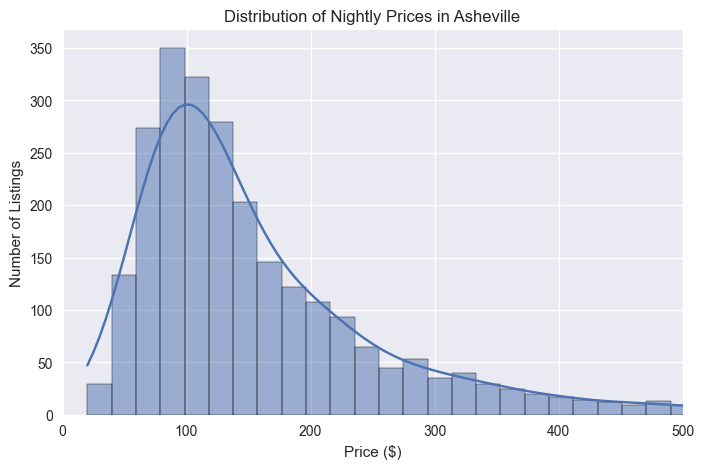

In [21]:
# Plot distribution of listing prices
plt.figure(figsize=(8, 5))
sns.histplot(listings["price"], bins=50, kde=True)

plt.title("Distribution of Nightly Prices in Asheville")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.xlim(0, 500)
plt.show()


### Price Distribution Insight
- Nightly prices in Asheville show a **right-skewed distribution**, with most listings
  concentrated between **80 and 150**.
- A small number of luxury listings priced above **300** significantly raise the average price.
- The **median price (127)** better represents the typical market rate than the mean.
- This suggests a strong mid-range market with limited but impactful luxury supply.


In [22]:
# Count number of listings per room type
room_type_counts = listings["room_type"].value_counts(normalize=True) * 100

room_type_counts


room_type
Entire home/apt    90.163282
Private room        9.040223
Hotel room          0.477897
Shared room         0.318598
Name: proportion, dtype: float64

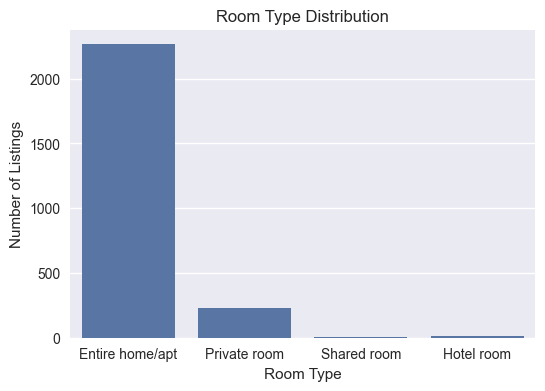

In [23]:
# Visualize room type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=listings, x="room_type")

plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()


### Room Type Insight
- The Asheville Airbnb market is overwhelmingly dominated by **Entire home/apartment listings**,
  which account for over **90%** of total supply.
- This indicates strong guest preference for privacy and full-property stays, likely driven by
  couples, families, and group travelers.
- Private rooms form a small secondary segment (~9%), while shared rooms and hotel rooms are
  negligible (<1%), suggesting limited opportunity in those categories.


In [24]:
# Count active listings per neighborhood
listings_per_neighbourhood = listings["neighbourhood"].value_counts()

listings_per_neighbourhood.head(10)


neighbourhood
28806    693
28801    511
28803    386
28804    350
28805    251
28704    170
28715     83
28732     67
Name: count, dtype: int64

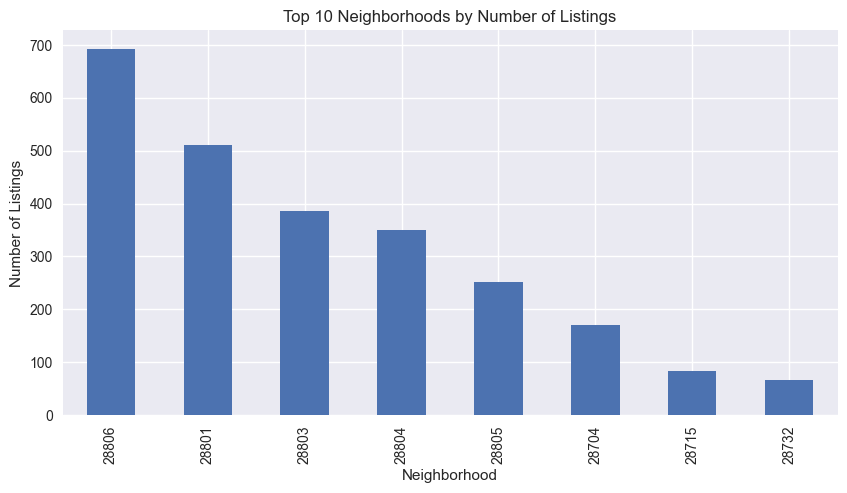

In [25]:
# Visualize top 10 neighborhoods by listing count
plt.figure(figsize=(10, 5))
listings_per_neighbourhood.head(10).plot(kind="bar")

plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.show()


### Neighborhood Supply Insight
- Airbnb listings in Asheville are **highly concentrated** in a small number of neighborhoods.
- ZIP codes **28806** and **28801** have the highest number of listings, indicating strong demand
  but also intense competition.
- Mid-supply neighborhoods such as **28805** and **28704** may offer better entry opportunities
  due to lower competition while still maintaining reasonable market presence.
- Low-supply neighborhoods likely represent niche or higher-risk areas for expansion.


##  Pricing Analysis by Neighborhood
In this section, we analyze how nightly prices vary across neighborhoods
to identify premium and budget areas within Asheville.


In [27]:
# Calculate the average nightly price for each neighborhood
price_by_neighbourhood = (
    listings
    .groupby("neighbourhood")["price"]
    .mean()
    .sort_values(ascending=False)
)

# Display the results
price_by_neighbourhood


neighbourhood
28732    191.223881
28805    175.147410
28803    172.968912
28715    172.963855
28801    172.610568
28704    171.070588
28804    165.025714
28806    153.981241
Name: price, dtype: float64

In [28]:
# Select the top 5 most expensive neighborhoods
top_5_expensive = price_by_neighbourhood.head(5)

top_5_expensive


neighbourhood
28732    191.223881
28805    175.147410
28803    172.968912
28715    172.963855
28801    172.610568
Name: price, dtype: float64

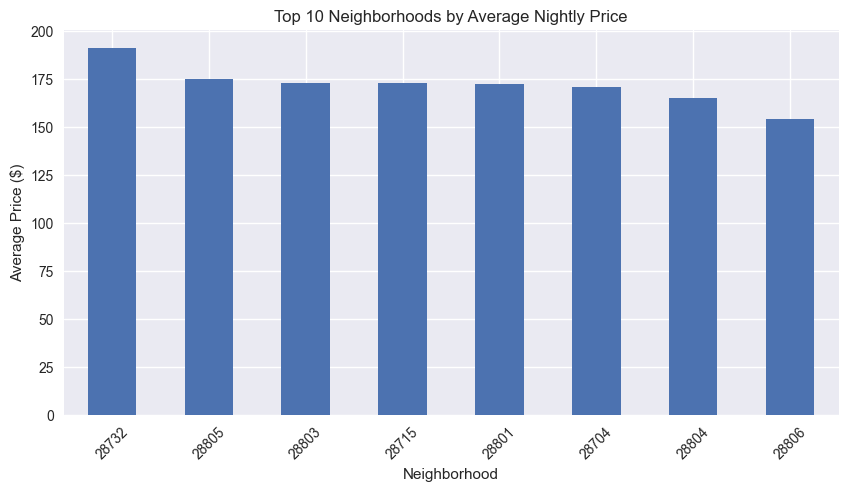

In [29]:
# Plot average price for top 10 most expensive neighborhoods
plt.figure(figsize=(10, 5))
price_by_neighbourhood.head(10).plot(kind="bar")

plt.title("Top 10 Neighborhoods by Average Nightly Price")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Create a combined table of supply and pricing
neighbourhood_summary = (
    listings
    .groupby("neighbourhood")
    .agg(
        total_listings=("id", "count"),
        average_price=("price", "mean"),
        median_price=("price", "median")
    )
    .sort_values(by="total_listings", ascending=False)
)

# Display top neighborhoods by supply
neighbourhood_summary.head(10)


,total_listings,average_price,median_price
neighbourhood,,,
28806,693,153.981241,116.0
28801,511,172.610568,136.0
28803,386,172.968912,139.0
28804,350,165.025714,132.0
28805,251,175.147410,127.0
28704,170,171.070588,128.5
28715,83,172.963855,122.0
28732,67,191.223881,127.0


### Neighborhood Pricing Insight
- The most expensive neighborhood (28732) has the **highest average price** but **very low listing supply**,
  indicating a niche, non-scalable luxury market.
- Neighborhoods such as **28801, 28803, and 28805** combine relatively high prices with substantial listing
  volume, suggesting strong demand but intense competition.
- **28806**, despite having the largest number of listings, shows lower average and median prices,
  indicating a more price-competitive, volume-driven market.
- Median prices across neighborhoods remain clustered around **$120–130**, reinforcing this range as
  the effective market price point for Asheville.
